# __고양이 개 분류__
## 딥러닝을 이용한 이미지 분류

In [1]:
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil
from torchvision import transforms
from torchvision import models

import torch
from torch.autograd import Variable
import torch.nn as nn
from torch import optim
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import time
%matplotlib inline

In [2]:
def imshow(inp) :
    inp = inp.numpy().transpose((1,2,0))
    mean = np.array([0.485,0.456,0.406])
    std = np.array([0.229, 0.224,0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0,1)
    plt.imshow(inp)

In [3]:
path = '/home/pirl/Joshua/PyTorch/data/dogsandcats/'

In [77]:
# 폴더 안에 모든 파일 목록을 읽음

files = glob(os.path.join(path,'*/*.jpg'))

print(f'Total no of images {len(files)}')

no_of_images = 25000
no_of_images = len(files)

Total no of images 25000


In [78]:
no_of_images*0.8

20000.0

In [79]:
# 데이터 집합을 만드는 데 사용할 셔플 색인 생성

shuffle = np.random.permutation(no_of_images)

In [80]:
# 검증 이미지를 저장할 검증용 디렉토리 생성
os.mkdir(os.path.join(path,'valid'))

In [81]:
# 레이블명으로 디렉토리 생성

for t in ['train','valid'] :
    for folder in ['dog/','cat/']:
        os.mkdir(os.path.join(path,t,folder))

In [67]:
folder = files[i].split('/')[-1].split('.')[0]
folder

'dog'

In [54]:
image = files[i].split('/')[-1];image

'dog.2647.jpg'

In [82]:
# valid 폴더에 이미지 2000장 복사

for i in shuffle[:2000]:
    #shutil.copyfile(files[i],'../chapter3/dogsandcats/valid/')
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'valid',folder,image))



In [85]:
# train 폴더에 이미지 2000장 복사

for i in shuffle[2000:]:
    #shutil.copyfile(files[i],'../chapter3/dogsandcats/valid/')
    folder = files[i].split('/')[-1].split('.')[0]
    image = files[i].split('/')[-1]
    os.rename(files[i],os.path.join(path,'train',folder,image))



## GPU 가용상태 확인

In [4]:
if torch.cuda.is_available():
    is_cuda = True

In [5]:
torch.cuda.is_available()

True

In [6]:
simple_transform = transforms.Compose([transforms.Resize((224,224))
                                       ,transforms.ToTensor()
                                       ,transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
train = ImageFolder('/home/pirl/Joshua/PyTorch/data/dogsandcats/train/',simple_transform)
valid = ImageFolder('/home/pirl/Joshua/PyTorch/data/dogsandcats/valid/',simple_transform)

---
* class_to_idx : 데이터 셋에서 사용하는 각 분류 클래스와 대응되는 인덱스 정보를 제공
+ classes : 분류 클래스 목록을 제공
---

In [7]:
print(train.class_to_idx)
print(train.classes) 


{'cat': 0, 'dog': 1}
['cat', 'dog']


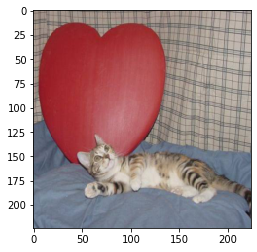

In [8]:
imshow(train[50][0])

## 배치 처리 형태 파이토치로 Tensor 로딩하기

#### DataLoader 클래스는 많은 옵션을 제공
- shuffle : True로 설정하면 DataLoader가 호출될 때 마다 이지가 임의의 순서로 섞인다.
- num_workers : 병렬 처리를 담당. 일반적으로 컴퓨터에서 사용할 수 있는 코어 수보다 작게 설정

In [12]:
train_data_gen = torch.utils.data.DataLoader(train, batch_size=64, num_workers=3)
valid_data_gen = torch.utils.data.DataLoader(valid, batch_size=64, num_workers=3)

#### 모델 설정

In [14]:
import torchvision.models as models

In [18]:
from ipywidgets import IntProgress

In [19]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = models_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

if is_cuda :
    model_ft = model_ft.cuda()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/pirl/.cache/torch/checkpoints/resnet18-5c106cde.pth


ImportError: FloatProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html